In [62]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2

## 0. EDA och filhantering

b)

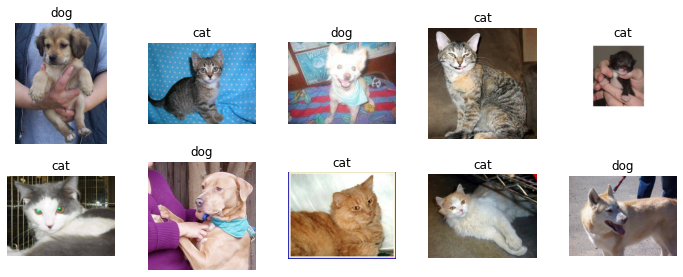

In [63]:
from dataset_split import get_filenames_from_path, gen_filename_dataframe
from image_operations import display_images

original_train_dir = os.path.abspath("./original_data/train/train")
train_pictures_filenames = get_filenames_from_path(original_train_dir)
train_pictures_one_hot = gen_filename_dataframe(train_pictures_filenames)

display_images(train_pictures_one_hot, original_train_dir)

In [64]:
train_pictures_one_hot.head()

,filename,label
0,dog.8011.jpg,0
1,cat.5077.jpg,1
2,dog.7322.jpg,0
3,cat.2718.jpg,1
4,cat.10151.jpg,1


c) Folder structure is created by running script *folder_structure.py*  

d)

In [65]:
from dataset_split import Complete_set_split_filenames

small_train_filenames, small_val_filenames, small_test_filenames = Complete_set_split_filenames(train_pictures_one_hot, (800,200,250))
tiny_train_filenames, tiny_val_filenames, tiny_test_filemnames = Complete_set_split_filenames(train_pictures_one_hot, (80,20,25))
small_train_filenames.label.count()

1600

In [66]:
train_pictures_one_hot.shape # [0] Should decrease each time as Complete split filenames is run, as Inplace = True, thus we avoid data leakage

(22250, 2)

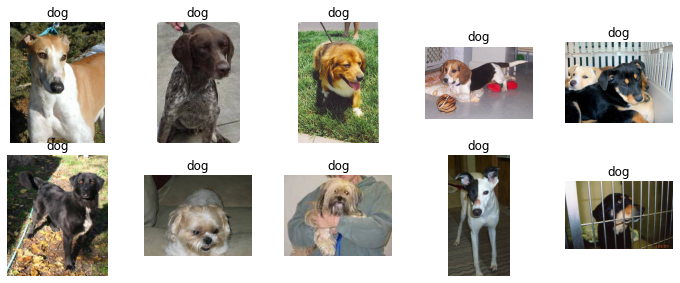

In [67]:
display_images(small_train_filenames, original_train_dir)

<AxesSubplot:xlabel='label', ylabel='count'>

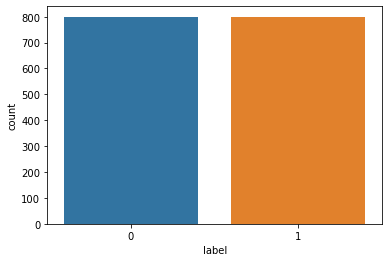

In [68]:
sns.countplot(data=small_train_filenames, x='label')

## 1. Bildbehandling

a)

In [69]:
from image_operations import extract_dimesion_distribution

small_train_sizes, small_train_oversized_pictures = extract_dimesion_distribution(small_train_filenames,original_train_dir)
small_val_sizes, small_val_oversized_pictures = extract_dimesion_distribution(small_val_filenames,original_train_dir)
small_test_sizes, small_test_oversized_pictures = extract_dimesion_distribution(small_test_filenames,original_train_dir)

small_sets_sizes = [small_train_sizes, small_val_sizes, small_test_sizes]

oversized pictures : []
oversized pictures : []
oversized pictures : []


In [70]:
len(small_train_sizes), len(small_train_filenames), len(small_val_sizes), len(small_val_filenames), len(small_test_filenames)

(1600, 1600, 400, 400, 500)

In [71]:
small_sets = [small_train_filenames, small_val_filenames, small_test_filenames]

for set in small_sets:
    set.reset_index(inplace=True)


small_train_dimesions_df = pd.DataFrame(small_train_sizes, columns =['height', 'width'])
small_train_with_dims = pd.concat([small_train_filenames, small_train_dimesions_df], axis = 1)

small_val_dimesions_df = pd.DataFrame(small_val_sizes, columns =['height', 'width'])
small_val_with_dims = pd.concat([small_val_filenames, small_val_dimesions_df], axis = 1)

small_test_dimesions_df = pd.DataFrame(small_test_sizes, columns =['height', 'width'])
small_test_with_dims = pd.concat([small_test_filenames, small_test_dimesions_df], axis = 1)

len(small_train_with_dims), len(small_val_with_dims), len(small_test_with_dims)

(1600, 400, 500)

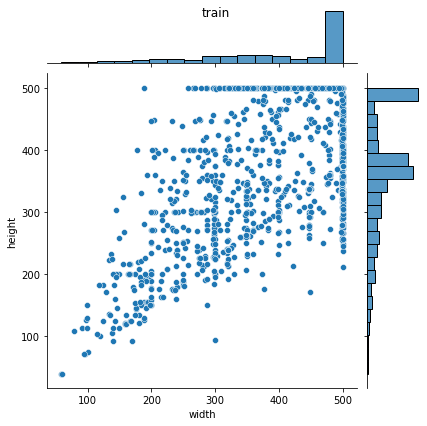

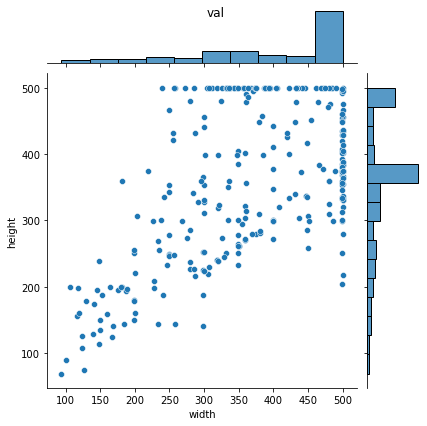

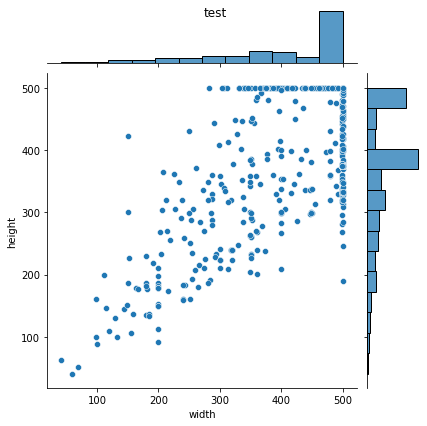

In [72]:
dims_dfs = [small_train_with_dims, small_val_with_dims, small_test_with_dims]
titles = ["train", "val", "test"]

for df, title in zip(dims_dfs, titles):
    sns.jointplot(data=df, x='width', y='height').fig.suptitle(title)




In [73]:
squares = [img for img in small_train_sizes if img[0] == img[1]]
len(squares)
print(f"ratio squares : {len(squares)/len(small_test_with_dims)}")

ratio squares : 0.004


In [74]:
condition = 'height <100 and width <100'
too_small_pics_train = small_train_with_dims.query(condition)
too_small_pics_val = small_val_with_dims.query(condition)
too_small_pics_test = small_test_with_dims.query(condition)

too_small_pics = too_small_pics_train, too_small_pics_val, too_small_pics_test
too_small_pics_train

,index,filename,label,height,width
67,23002,dog.9705.jpg,0,39,59
413,18861,dog.7459.jpg,0,71,96
1037,17589,cat.8138.jpg,1,71,95
1595,21540,cat.4821.jpg,1,39,60


In [75]:
small_train_with_dims.drop(too_small_pics_train.index, axis = 0, inplace = True)
small_val_with_dims.drop(too_small_pics_val.index, axis = 0, inplace = True)
small_test_with_dims.drop(too_small_pics_test.index, axis = 0, inplace = True)



small_test_with_dims

,index,filename,label,height,width
0,12067,dog.3255.jpg,0,130,129
1,3385,dog.565.jpg,0,337,449
2,5617,dog.4015.jpg,0,320,480
3,10717,dog.5009.jpg,0,240,319
4,15386,dog.11426.jpg,0,330,288
...,...,...,...,...,...
495,12400,cat.921.jpg,1,174,216
496,14363,cat.4664.jpg,1,209,399
497,22540,cat.3227.jpg,1,443,291
498,18372,cat.9541.jpg,1,179,200


In [77]:
from image_operations import read_and_resize_images
X_train_small = read_and_resize_images(small_train_with_dims, original_train_dir,(299,299))
X_train_val_small = read_and_resize_images(small_val_with_dims, original_train_dir,(299,299))
X_train_test_small = read_and_resize_images(small_test_with_dims, original_train_dir,(299,299))

In [79]:
X_train_small.shape, X_train_val_small.shape, X_train_test_small.shape

((1596, 299, 299, 3), (399, 299, 299, 3), (497, 299, 299, 3))

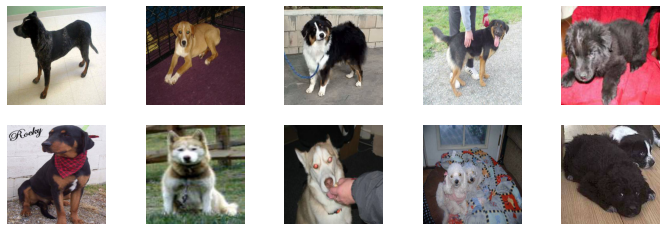

In [80]:
from image_operations import display_images_array

display_images_array(X_train_val_small)

In [82]:
data_y = small_test_with_dims['label']
data_y
# Concat' ?

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: label, Length: 497, dtype: int64